# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images.

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**

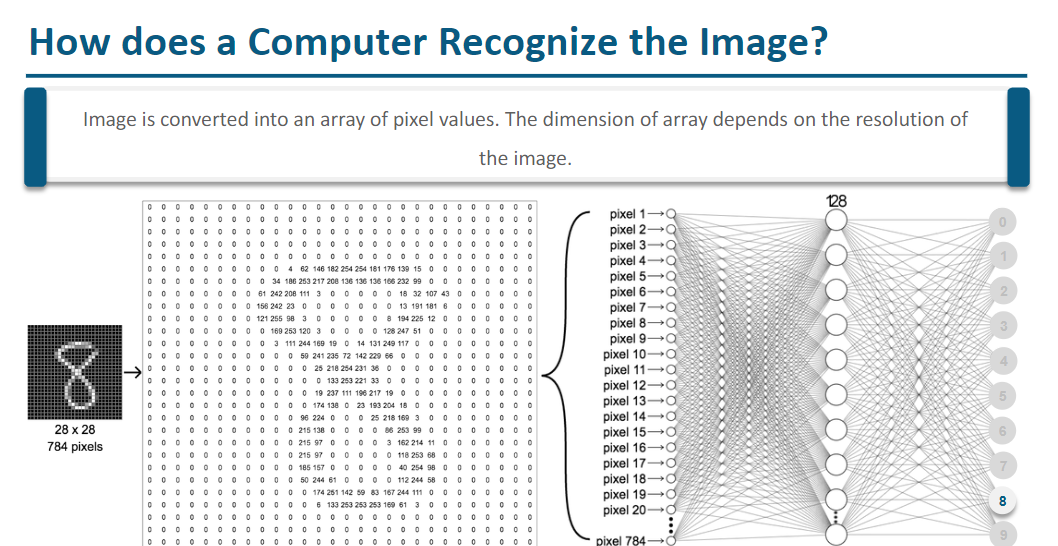


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

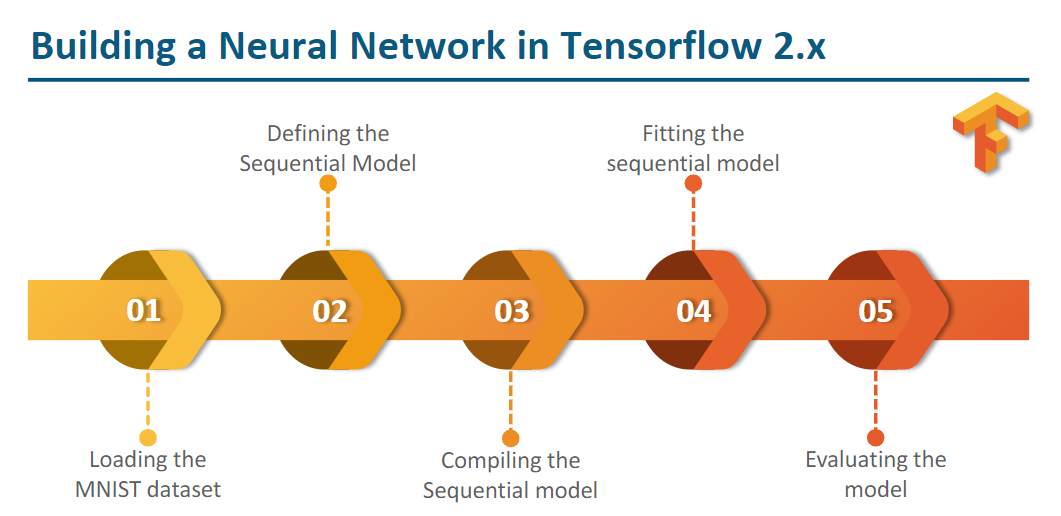

##Installing TensorFlow 2.x

In [1]:
# !pip install tensorflow

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras



##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [8]:
# Compiling the model.
model_0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training the model.
log_dir = "logs/fit/model0"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_0.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 3ms/step - loss: 1.4006 - accuracy: 0.6568 - val_loss: 0.8940 - val_accuracy: 0.8317
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.7928 - accuracy: 0.8313 - val_loss: 0.6553 - val_accuracy: 0.8583
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.8518 - val_loss: 0.5596 - val_accuracy: 0.8702
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5703 - accuracy: 0.8618 - val_loss: 0.5070 - val_accuracy: 0.8765
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.8693 - val_loss: 0.4732 - val_accuracy: 0.8818
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4961 - accuracy: 0.8744 - val_loss: 0.4492 - val_accuracy: 0.8867
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4737 - accuracy: 0.8782 - val_loss: 0.4311 - val_accuracy: 0.8903
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


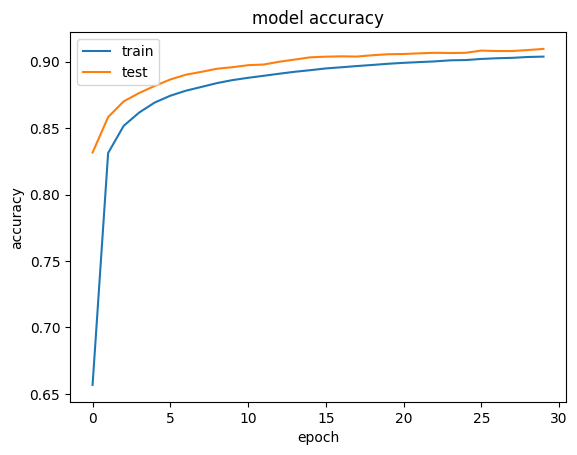

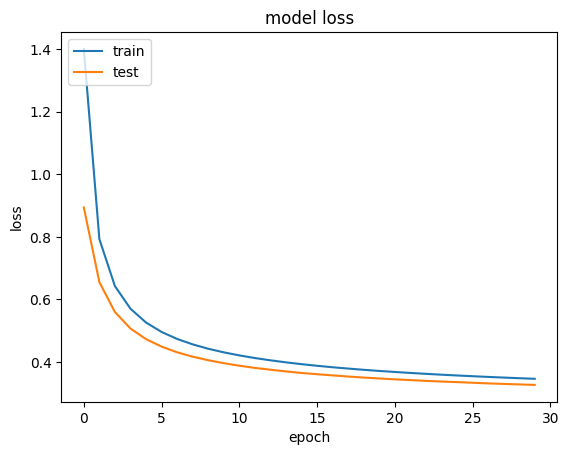

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.9112
Test accuracy: 0.9111999869346619


In [13]:
model_0.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

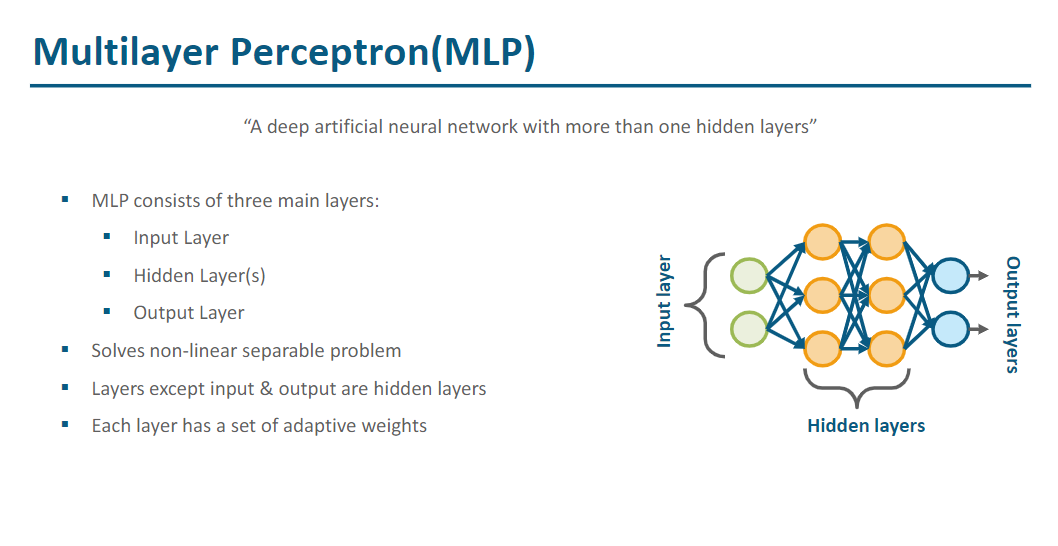

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron

In [15]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [16]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model.
log_dir = "logs/fit/model1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_1.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 1.5525 - accuracy: 0.5638 - val_loss: 0.8294 - val_accuracy: 0.8224
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6438 - accuracy: 0.8405 - val_loss: 0.4814 - val_accuracy: 0.8767
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4623 - accuracy: 0.8743 - val_loss: 0.3916 - val_accuracy: 0.8928
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8883 - val_loss: 0.3505 - val_accuracy: 0.9015
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.8969 - val_loss: 0.3251 - val_accuracy: 0.9060
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.9039 - val_loss: 0.3061 - val_accuracy: 0.9120
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.9086 - val_loss: 0.2928 - val_accuracy: 0.9158
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


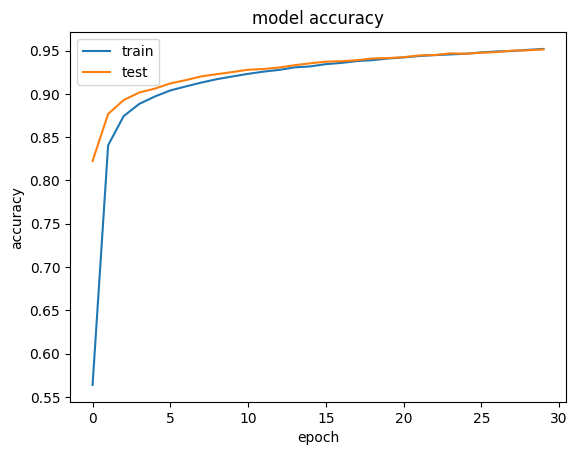

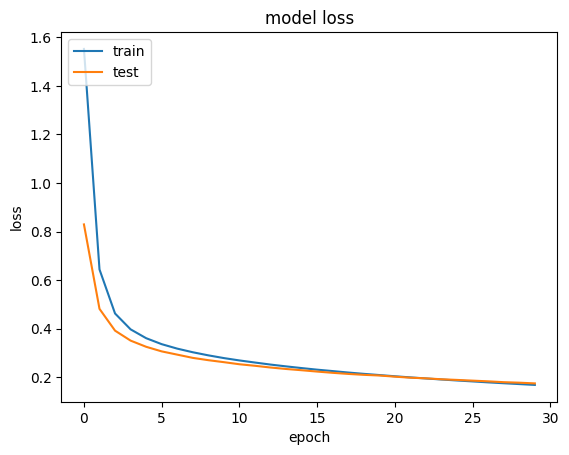

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1696 - accuracy: 0.9495
Test accuracy: 0.9495000243186951


In [20]:
model_1.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7fec84096b60>>

In [21]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.03133388, -0.05069312, -0.05520091, ...,  0.0675889 ,
         -0.02462119,  0.03132821],
        [-0.01791423,  0.02886634,  0.07583355, ...,  0.00497044,
          0.03190584,  0.07573443],
        [ 0.01122736,  0.02037746, -0.04853753, ...,  0.04241116,
          0.06510238,  0.01299343],
        ...,
        [ 0.04418459, -0.07474806, -0.05048044, ...,  0.07442846,
          0.00161493,  0.04741422],
        [-0.01255226,  0.00292605, -0.06116362, ...,  0.04131451,
          0.05454893,  0.06767749],
        [ 0.02468117,  0.04541148,  0.0617064 , ..., -0.05985207,
          0.05232485, -0.04303003]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-4.62864488e-02,  1.13900565e-02, -3.03874910e-02,  2.35807877e-02,
        -2.67270356e-02, -1.59928519e-02,  6.44617230e-02,  2.95955152e-03,
         6.14341721e-02,  1.13274589e-01,  4.19754647e-02,  3

In [22]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [63]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [64]:
# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# Training the model.
log_dir = "logs/fit/model2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_2.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 1.7471 - accuracy: 0.4346 - val_loss: 0.9532 - val_accuracy: 0.7954
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.9516 - accuracy: 0.7139 - val_loss: 0.5451 - val_accuracy: 0.8642
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.7070 - accuracy: 0.7860 - val_loss: 0.4254 - val_accuracy: 0.8887
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.5982 - accuracy: 0.8207 - val_loss: 0.3694 - val_accuracy: 0.8978
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.5325 - accuracy: 0.8405 - val_loss: 0.3362 - val_accuracy: 0.9057
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4893 - accuracy: 0.8547 - val_loss: 0.3112 - val_accuracy: 0.9118
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.8656 - val_loss: 0.2922 - val_accuracy: 0.9149
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


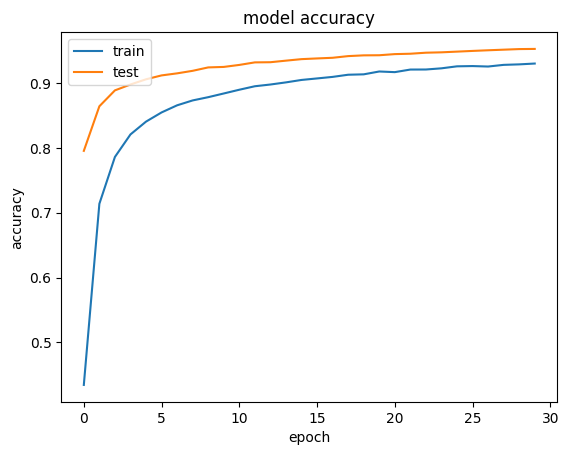

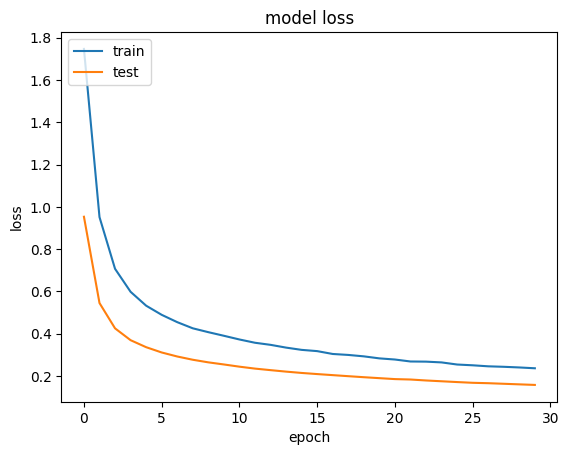

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1579 - accuracy: 0.9532
Test accuracy: 0.9531999826431274


In [28]:
model_2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff37fd4bee0>>

In [29]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.05164165, -0.03410652, -0.04229696, ...,  0.04448729,
          0.0663766 , -0.0097571 ],
        [-0.01541676, -0.06275568,  0.00343175, ..., -0.04346615,
          0.04307877, -0.04782116],
        [ 0.01340556, -0.0160832 ,  0.00191417, ..., -0.03592553,
         -0.07479292, -0.01693722],
        ...,
        [-0.05474013, -0.03763838, -0.06771729, ...,  0.07708523,
         -0.01900659, -0.05300978],
        [-0.01746012,  0.05012863, -0.04958458, ...,  0.02149655,
          0.06304943,  0.00510218],
        [ 0.0344032 ,  0.02045648,  0.00336175, ..., -0.00852492,
          0.01355749,  0.05887457]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.00982421, -0.01811018,  0.04966934, -0.02537248, -0.01426842,
         0.04005663,  0.11608721, -0.02814745,  0.0593507 , -0.02465271,
         0.04707702, -0.02501986, -0.00358831,  0.0970258 ,  0.00

In [30]:
model_2.get_config()

{'name': 'sequential_2',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 3: Changing the Optimizer - Adam

In [68]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [69]:
# Compiling the model.
model_3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
# Training the model.
log_dir = "logs/fit/model3"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)


Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.7025 - accuracy: 0.7828 - val_loss: 0.2419 - val_accuracy: 0.9294
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.9009 - val_loss: 0.1761 - val_accuracy: 0.9498
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2751 - accuracy: 0.9198 - val_loss: 0.1549 - val_accuracy: 0.9541
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2384 - accuracy: 0.9295 - val_loss: 0.1427 - val_accuracy: 0.9597
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9350 - val_loss: 0.1300 - val_accuracy: 0.9648
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2020 - accuracy: 0.9403 - val_loss: 0.1254 - val_accuracy: 0.9645
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1877 - accuracy: 0.9438 - val_loss: 0.1190 - val_accuracy: 0.9658
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


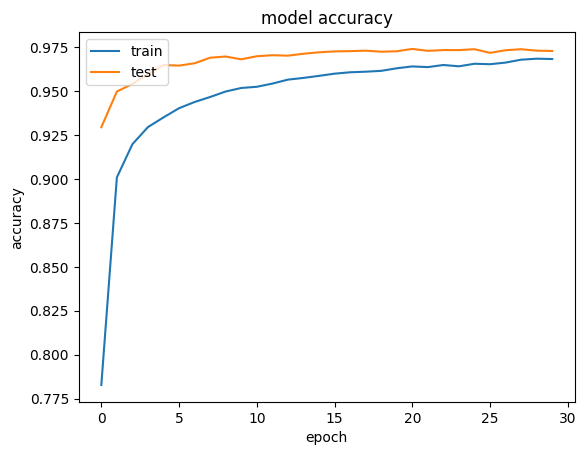

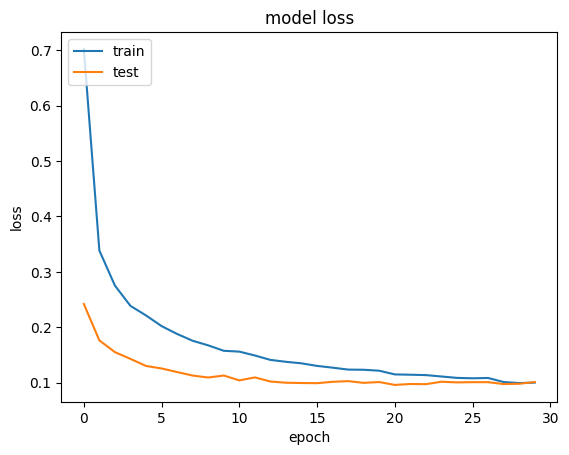

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


In [36]:
model_3.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff37fb81c00>>

In [37]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.02194967, -0.00592558, -0.07360023, ...,  0.03223338,
         -0.0385007 , -0.01337561],
        [ 0.06501018,  0.07586905, -0.04098151, ...,  0.0138239 ,
         -0.00372992,  0.07123096],
        [-0.06082321, -0.04569434,  0.02681047, ...,  0.07384834,
         -0.0616947 , -0.08163922],
        ...,
        [ 0.0679769 ,  0.01200866, -0.07938237, ..., -0.05461421,
         -0.04070019,  0.04814421],
        [-0.08043148, -0.01460016,  0.06254309, ...,  0.01535139,
          0.03735886, -0.00126315],
        [ 0.04545318, -0.04490671,  0.07343896, ...,  0.00547881,
         -0.05681738,  0.02888096]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.2914548 ,  0.07936233, -0.4436349 , -0.16215879,  0.1743345 ,
         0.01215196,  0.2539875 ,  0.1534085 ,  0.15744762,  0.12254164,
        -0.02455788,  0.18836772, -0.01046026,  0.19441323,  0.2962

In [38]:
model_3.get_config()

{'name': 'sequential_3',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build

###Improved Model 4: Increasing the number of Hidden Layer neuron

In [72]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [73]:
# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# Training the model.
log_dir = "logs/fit/model4"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)


Epoch 1/30
375/375 [==============================] - 4s 8ms/step - loss: 0.3010 - accuracy: 0.9081 - val_loss: 0.1268 - val_accuracy: 0.9619
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 0.1273 - accuracy: 0.9608 - val_loss: 0.0977 - val_accuracy: 0.9691
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0906 - val_accuracy: 0.9731
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0629 - accuracy: 0.9795 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0777 - val_accuracy: 0.9766
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0761 - val_accuracy: 0.9795
Epoch 

In [42]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9834
Test accuracy: 0.9833999872207642


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


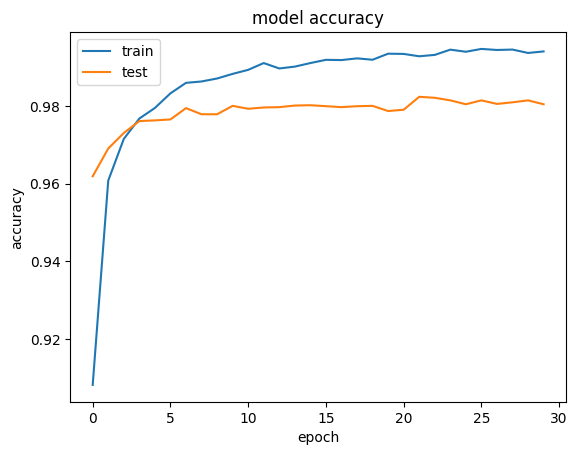

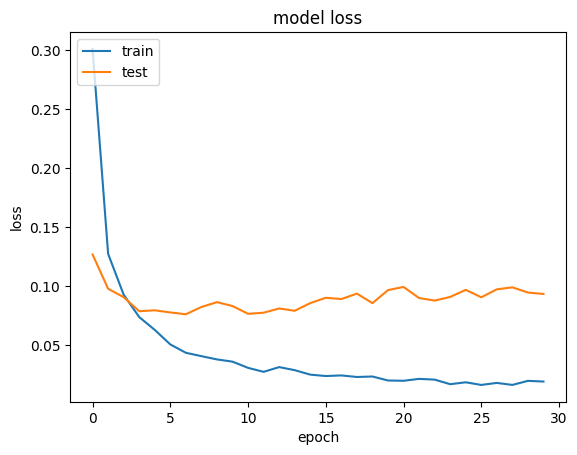

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
model_4.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff37fa8e6e0>>

In [45]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06760387, -0.06545047,  0.01004143, ..., -0.01028473,
          0.04863808, -0.04260213],
        [ 0.00423513, -0.01215624, -0.00297488, ...,  0.05389569,
          0.01420992,  0.06325787],
        [ 0.03485493,  0.04287169,  0.03957739, ..., -0.04738765,
          0.05148671, -0.00520925],
        ...,
        [-0.0509127 , -0.04345296,  0.03699172, ..., -0.01722523,
         -0.0389346 ,  0.01549033],
        [-0.05288437,  0.06063889, -0.00117664, ...,  0.05969392,
          0.01654029, -0.04213928],
        [ 0.04831239, -0.04038166,  0.00870753, ..., -0.02333626,
         -0.03611897, -0.02772043]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-3.37616950e-02, -5.84273636e-02, -1.04306318e-01,  1.45014962e-02,
        -7.64125288e-02,  2.52986867e-02, -9.14965291e-03,  2.02299319e-02,
         3.38966623e-02, -1.06195631e-02, -7.14801475e-02, 

In [46]:
model_4.get_config()

{'name': 'sequential_4',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 5: Manipulating the batch size

In [76]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [77]:
# Compiling the model.
model_5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
# Training the model.
log_dir = "logs/fit/model5"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_5.fit(X_train, Y_train, batch_size=480, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)


Epoch 1/30
100/100 [==============================] - 2s 13ms/step - loss: 0.4488 - accuracy: 0.8666 - val_loss: 0.1719 - val_accuracy: 0.9489
Epoch 2/30
100/100 [==============================] - 1s 11ms/step - loss: 0.1662 - accuracy: 0.9502 - val_loss: 0.1151 - val_accuracy: 0.9654
Epoch 3/30
100/100 [==============================] - 1s 12ms/step - loss: 0.1156 - accuracy: 0.9649 - val_loss: 0.0918 - val_accuracy: 0.9736
Epoch 4/30
100/100 [==============================] - 1s 11ms/step - loss: 0.0904 - accuracy: 0.9713 - val_loss: 0.0914 - val_accuracy: 0.9721
Epoch 5/30
100/100 [==============================] - 1s 11ms/step - loss: 0.0726 - accuracy: 0.9777 - val_loss: 0.0807 - val_accuracy: 0.9759
Epoch 6/30
100/100 [==============================] - 1s 11ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 7/30
100/100 [==============================] - 1s 12ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0724 - val_accuracy: 0.9778

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


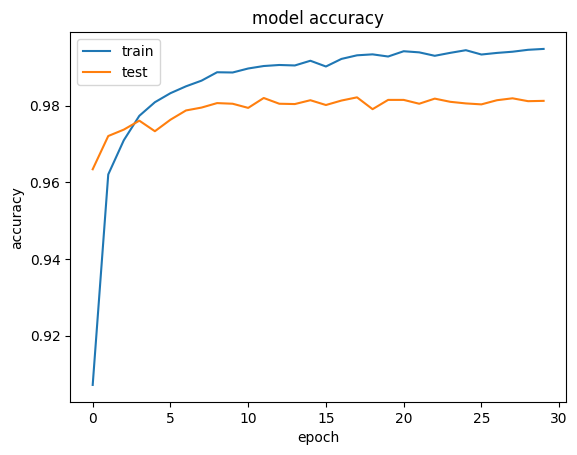

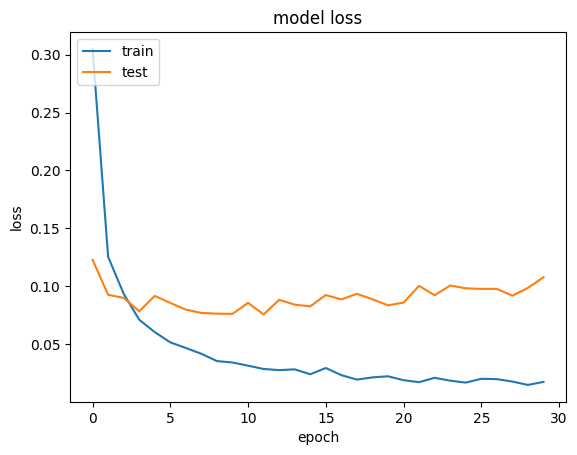

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9825
Test accuracy: 0.9825000166893005


In [52]:
model_5.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff37f2c7070>>

In [53]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.01213428, -0.00945061,  0.06488191, ...,  0.03032487,
         -0.00165134, -0.05485972],
        [ 0.06547548,  0.05974582, -0.03639822, ..., -0.05211858,
         -0.06514907, -0.05839844],
        [ 0.01210518, -0.02045663, -0.01508054, ...,  0.03297305,
          0.05747165,  0.06761631],
        ...,
        [ 0.00022045, -0.0197619 ,  0.02981431, ...,  0.02011286,
          0.04823186, -0.02480073],
        [ 0.05778106, -0.00097829,  0.02746993, ..., -0.06167538,
          0.04625643, -0.03272591],
        [ 0.01532412,  0.01027861, -0.01567716, ...,  0.05256924,
          0.01672871, -0.02164698]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-2.72355415e-02,  4.75261435e-02, -7.95459002e-02,  2.45328024e-02,
        -1.09106395e-02, -5.53950593e-02,  2.58478913e-02, -1.56220019e-01,
        -4.23920825e-02, -8.14343914e-02, -1.03715271e-01, 

In [54]:
model_5.get_config()

{'name': 'sequential_5',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 6: Adding Another Hidden Layer to the Model

In [79]:
import tensorflow as tf

#In Keras, layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [80]:
# Compiling the model.
model_6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
# Training the model.
log_dir = "logs/fit/model6"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_6.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 5s 11ms/step - loss: 0.3259 - accuracy: 0.9004 - val_loss: 0.1253 - val_accuracy: 0.9632
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1358 - accuracy: 0.9592 - val_loss: 0.1031 - val_accuracy: 0.9678
Epoch 3/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1029 - accuracy: 0.9677 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0847 - accuracy: 0.9732 - val_loss: 0.0818 - val_accuracy: 0.9760
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0707 - accuracy: 0.9781 - val_loss: 0.0934 - val_accuracy: 0.9765
Epoch 6/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0887 - val_accuracy: 0.9750
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0570 - accuracy: 0.9817 - val_loss: 0.0819 - val_accuracy: 0.9778

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


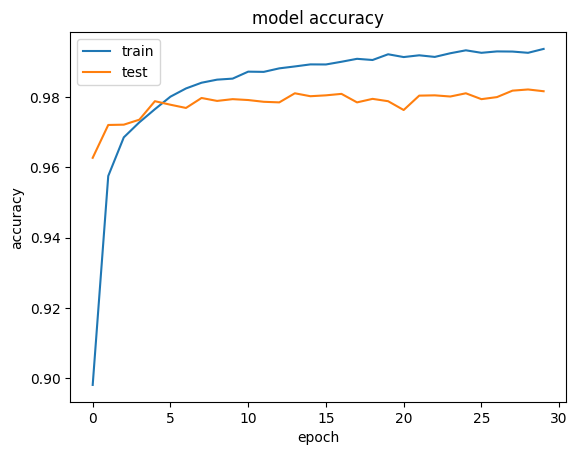

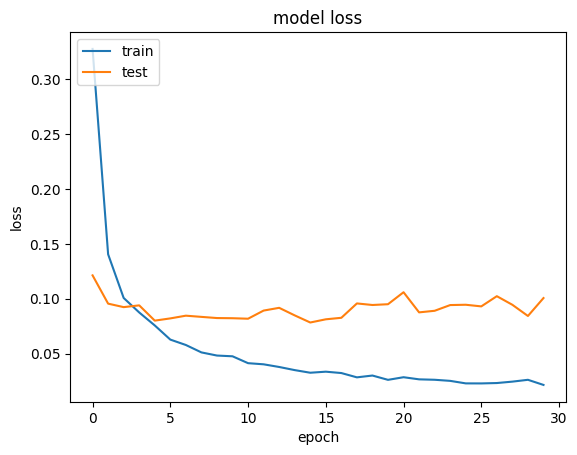

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9823
Test accuracy: 0.9822999835014343


In [60]:
model_6.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff37e640af0>>

In [61]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01444396, -0.01258092, -0.06669837, ...,  0.0680228 ,
          0.01035135,  0.01786448],
        [ 0.02585502,  0.0543195 , -0.05795367, ..., -0.02742758,
         -0.01531597,  0.01572628],
        [-0.06675857,  0.03710688,  0.03950918, ...,  0.03580025,
          0.04174048, -0.05321031],
        ...,
        [-0.03596389,  0.02393483,  0.03809834, ...,  0.06205323,
         -0.0652212 ,  0.00174325],
        [ 0.01055535, -0.02532765, -0.0116647 , ..., -0.01281323,
         -0.05722484,  0.04327232],
        [-0.00695291, -0.0397505 , -0.01666747, ...,  0.03909611,
         -0.02065109, -0.02082287]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.00568774, -0.05610943, -0.07432386,  0.00399133, -0.04590491,
         0.03271652, -0.16164345, -0.08097097, -0.0102023 , -0.07232493,
         0.04299337, -0.07686266, -0.00660563, -0.02339198, -0.04

In [62]:
model_6.get_config()

{'name': 'sequential_6',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil